In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [102]:
df = pd.read_csv('StudentsPerformance.csv')
# Importing the dataset
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [103]:
#Analysing the columns in the dataset
for cols in df.columns:
    if df[cols].dtype == 'object':
        print(f"{cols} is a categorical variable")
        print(df[cols].unique())
    else:
        print(f"{cols} is a numerical variable")
        print(df[cols].unique())
"""
We have checked the columns and identified the type and flaws.
What we can see in parental level of education is that there are so many random values like 'some high school', 'some college'.
We have to convert some high school to high school and preferably some college to bachelor's degree.
"""

gender is a categorical variable
['female' 'male']
race/ethnicity is a categorical variable
['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education is a categorical variable
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch is a categorical variable
['standard' 'free/reduced']
test preparation course is a categorical variable
['none' 'completed']
math score is a numerical variable
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score is a numerical variable
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51

"\nWe have checked the columns and identified the type and flaws.\nWhat we can see in parental level of education is that there are so many random values like 'some high school', 'some college'.\nWe have to convert some high school to high school and preferably some college to bachelor's degree.\n"

In [104]:
#Now we shall check for null values in the dataset
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [105]:
""" There are no null values in the dataset.
Now we shall check for duplicate values in the dataset."""
df.duplicated().sum()

np.int64(0)

In [106]:
#No duplicate values in the dataset.
""" We have checked the columns and identified the data types, since there is no necessity for cleaning the data due to no presence of null values and duplicates"""
#We can check for outliers in the dataset and remove them, according to the scores. This is because the scores like 0 or 8 are too low and rather exceptional.
#There could be cases like absence or some other reason that could alter our predictions.
#DATA ANALYSIS

' We have checked the columns and identified the data types, since there is no necessity for cleaning the data due to no presence of null values and duplicates'

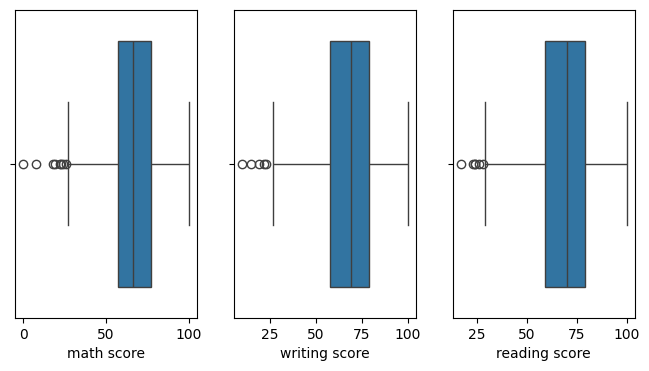

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4)) 
sns.boxplot(x=df['math score'], ax=axes[0])
sns.boxplot(x=df['writing score'], ax=axes[1])
sns.boxplot(x=df['reading score'], ax=axes[2])
plt.show()

In [108]:
"""We have found outliers in all the three scores, whose count shall be taken and accordingly be removed"""
#Outliers found only on the left side of the boxplot
IQRm = df['math score'].quantile(0.75) - df['math score'].quantile(0.25)
lowerm = df['math score'].quantile(0.25) - 1.5 * IQRm
IQRw = df['writing score'].quantile(0.75) - df['writing score'].quantile(0.25)
lowerw = df['writing score'].quantile(0.25) - 1.5 * IQRw
IQRr = df['reading score'].quantile(0.75) - df['reading score'].quantile(0.25)
lowerr = df['reading score'].quantile(0.25) - 1.5 * IQRr
#Count of outliers all together that are to be removed
df[(df['math score']<lowerm) | (df['writing score']<lowerw) | (df['reading score']<lowerr)].count()


gender                         12
race/ethnicity                 12
parental level of education    12
lunch                          12
test preparation course        12
math score                     12
reading score                  12
writing score                  12
dtype: int64

In [109]:
#12 is negligible among a 1000 rows dataset, so we can remove them
df = df[((df['math score']>=lowerm) & (df['writing score']>=lowerw) & (df['reading score']>=lowerr))]
df #Outliers removed

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


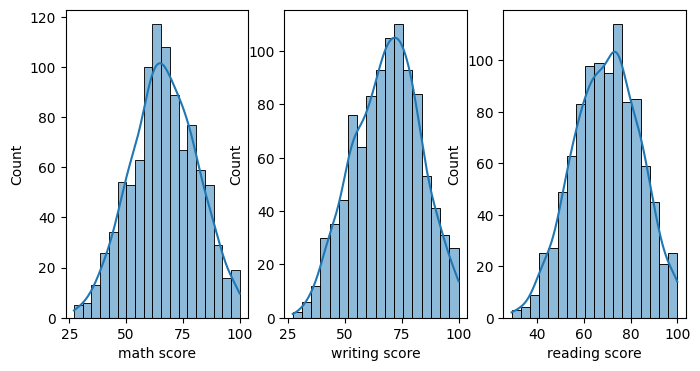

In [110]:
"""Once the outliers are removed, we can check the distribution of the scores in the dataset."""
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
sns.histplot(df['math score'], kde=True, ax=axes[0])
sns.histplot(df['writing score'], kde=True, ax=axes[1])
sns.histplot(df['reading score'], kde=True, ax=axes[2])
plt.show()
#Near Gaussion distribution, so we can proceed with encoding the categorical variables and scaling the numerical variables.

In [111]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
#Encoding the categorical variables
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df

C:\Users\saisi\AppData\Local\Temp\ipykernel_20180\1853775412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = le.fit_transform(df['gender'])
C:\Users\saisi\AppData\Local\Temp\ipykernel_20180\1853775412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
C:\Users\saisi\AppData\Local\Temp\ipykernel_20180\1853775412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,bachelor's degree,1,1,72,72,74
1,0,2,some college,1,0,69,90,88
2,0,1,master's degree,1,1,90,95,93
3,1,0,associate's degree,0,1,47,57,44
4,1,2,some college,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,master's degree,1,0,88,99,95
996,1,2,high school,0,1,62,55,55
997,0,2,high school,0,0,59,71,65
998,0,3,some college,1,0,68,78,77


In [112]:
"""We need to change the 'some college' to 'bachelor's degree' and 'some high school' to 'high school' in the parental level of education column"""
df['parental level of education'] = df['parental level of education'].replace({'some college': 'bachelor\'s degree', 'some high school': 'high school'})
df['parental level of education'].unique()

C:\Users\saisi\AppData\Local\Temp\ipykernel_20180\75499258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parental level of education'] = df['parental level of education'].replace({'some college': 'bachelor\'s degree', 'some high school': 'high school'})


array(["bachelor's degree", "master's degree", "associate's degree",
       'high school'], dtype=object)

In [113]:
#Now we can encode the parental level of education column using the Label Encoder
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df
#OUR DATASET IS READY FOR MACHINE LEARNING MODELS

C:\Users\saisi\AppData\Local\Temp\ipykernel_20180\2031572961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parental level of education'] = le.fit_transform(df['parental level of education'])


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,1,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,1,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,1,1,0,68,78,77


In [114]:
"""
There is something that we need to note before we proceed with the machine learning models.
We are using the categorical variables and data to predict the scores of the students and we are not using the scores to predict each other.
We can use different models to predict in consideration of the input:
1. If no score is given as input, we can use the categorical variables to predict the scores as a range of marks, this can have a wider range.
2. If one score is given as input, we can use the categorical variables and that one score to predict the missing score.
3. If two scores are given as input, we can use the categorical variables and those two scores to predict the missing score.
And if all three are given then there is no need to predict anything.
"""
#We shall consider a range of marks as the output, so when we are using random forest regressor, we can take the mean of standard deviations from the n_estimators and use that as the + or - range.
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
"""This function is used to predict the scores of the students based on the categorical variables only.
   Through tests it has been seen that the scores predicted are really fitting to the actual scores but this being a completely categorical input to regression
    model, the range of marks is quite wide so it cannot be used to predict the exact scores.
"""
X = df.drop(['math score', 'writing score', 'reading score'], axis=1)
y = df[['math score', 'writing score', 'reading score']]
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict for X_test
preds = model.predict(X_test)
for i in range(len(preds)):
    print(preds[i], y_test.iloc[i].values) #ONLY FOR TESTING PURPOSES
    
"""Implementing this model to the required functions that predict scores based on input
FINAL USABLE FUNCTION CASE.1"""
def predict_cat(input_data):
    cat_only_model = RandomForestRegressor(n_estimators=100, random_state=42)
    cat_only_model.fit(X, y)
    input_df = pd.DataFrame([input_data])
    input_df = input_df.drop(['math score', 'writing score', 'reading score'], axis=1)
    prediction = cat_only_model.predict(input_df)
    return prediction[0]
#This function takes a dictionary of input data with categorical variables and returns the predicted scores as a list.

[52.51987215 40.70689275 43.00072328] [66 70 77]
[75.1976928  68.2215049  69.53757961] [49 43 51]
[70.67869048 64.46861905 63.76745238] [79 77 78]
[75.67360763 86.30812646 84.99982765] [59 75 64]
[63.85061436 56.97912626 64.06149856] [27 36 34]
[65.85760678 70.88496242 72.31718781] [81 79 77]
[79.28739394 78.18421212 78.13707576] [81 82 82]
[61.50742063 77.44896825 77.74114683] [77 98 89]
[64.17743254 55.71840476 63.72402381] [39 34 39]
[65.62998089 70.21108677 75.07646925] [55 73 73]
[73.40793482 67.97045588 70.28050103] [69 53 58]
[57.69963095 66.10889286 66.7134881 ] [65 74 77]
[50.6654881  62.6817381  68.01020635] [41 48 51]
[74.80313114 81.38030974 80.71811782] [65 62 67]
[63.64535967 58.21323882 64.14287879] [80 66 64]
[55.07500902 64.51546934 69.18400577] [72 79 81]
[48.72926589 56.64492578 60.5701853 ] [36 43 53]
[73.82455977 63.73517332 67.66754347] [69 54 60]
[78.15760317 86.23348413 87.04030952] [62 68 68]
[55.32457323 61.35245346 67.61856025] [61 57 60]
[75.1976928  68.2215